<p><a name="sections"></a></p>


# Data Exploration
</a><br>
- <a href="#glance">First Glance at the Data</a><br>
- <a href="#processing">Data Processing</a><br>
</a><br>
- **Understand the problem**.  We'll first look at the data and each variable about their meaning and importance for this problem.
- **Univariable study**. We'll just focus on the dependent variable ('SalePrice') and use domain knowledge to handle it.
- **Multivariate study**. We'll try to understand how the dependent variable and independent variables relate.
- **Basic cleaning**. We'll clean the dataset and handle the missing data, outliers and both numeric and categorical variables.
- **Test assumptions**. We'll check if our data meets the assumptions required by most multivariate techniques.
- **Functionize**. The findings in this data exploration will be summarized in a data processing function for modeling use.


In [2]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

#Comprehensive data exploration with Python
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<p><a name="glance"></a></p>

## First Glance at the Data 

In [3]:
# Importing data 

df_raw = pd.read_csv('train.csv',index_col=0)
#df_raw_test = pd.read_csv('test.csv',index_col=0)
#df_raw = pd.concat([df_raw, df_raw_test], sort = False) 
#df_raw.describe()

In [ ]:
# df_raw.columnss
# df_raw.dtypes

In [ ]:
# correlation 

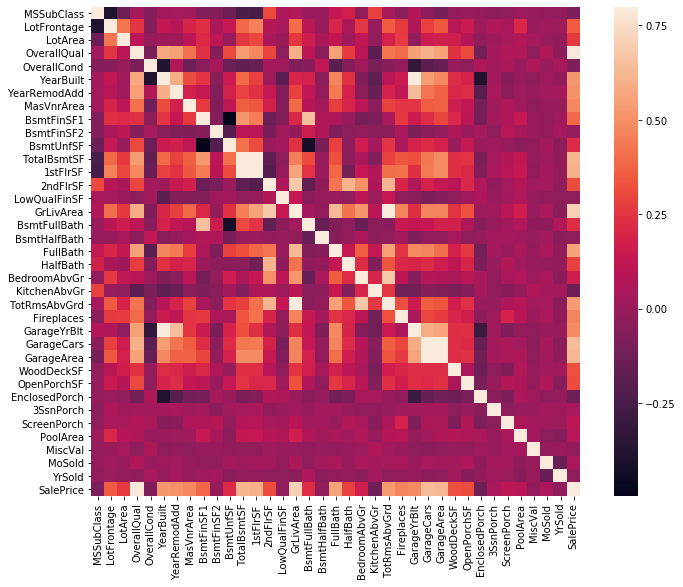

In [27]:
#correlation matrix
corrmat = df_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

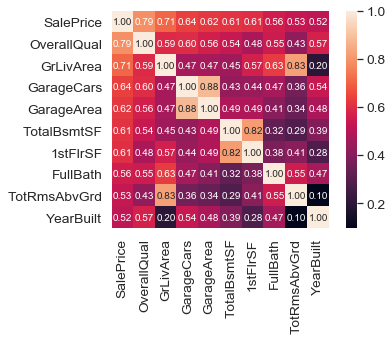

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_raw[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

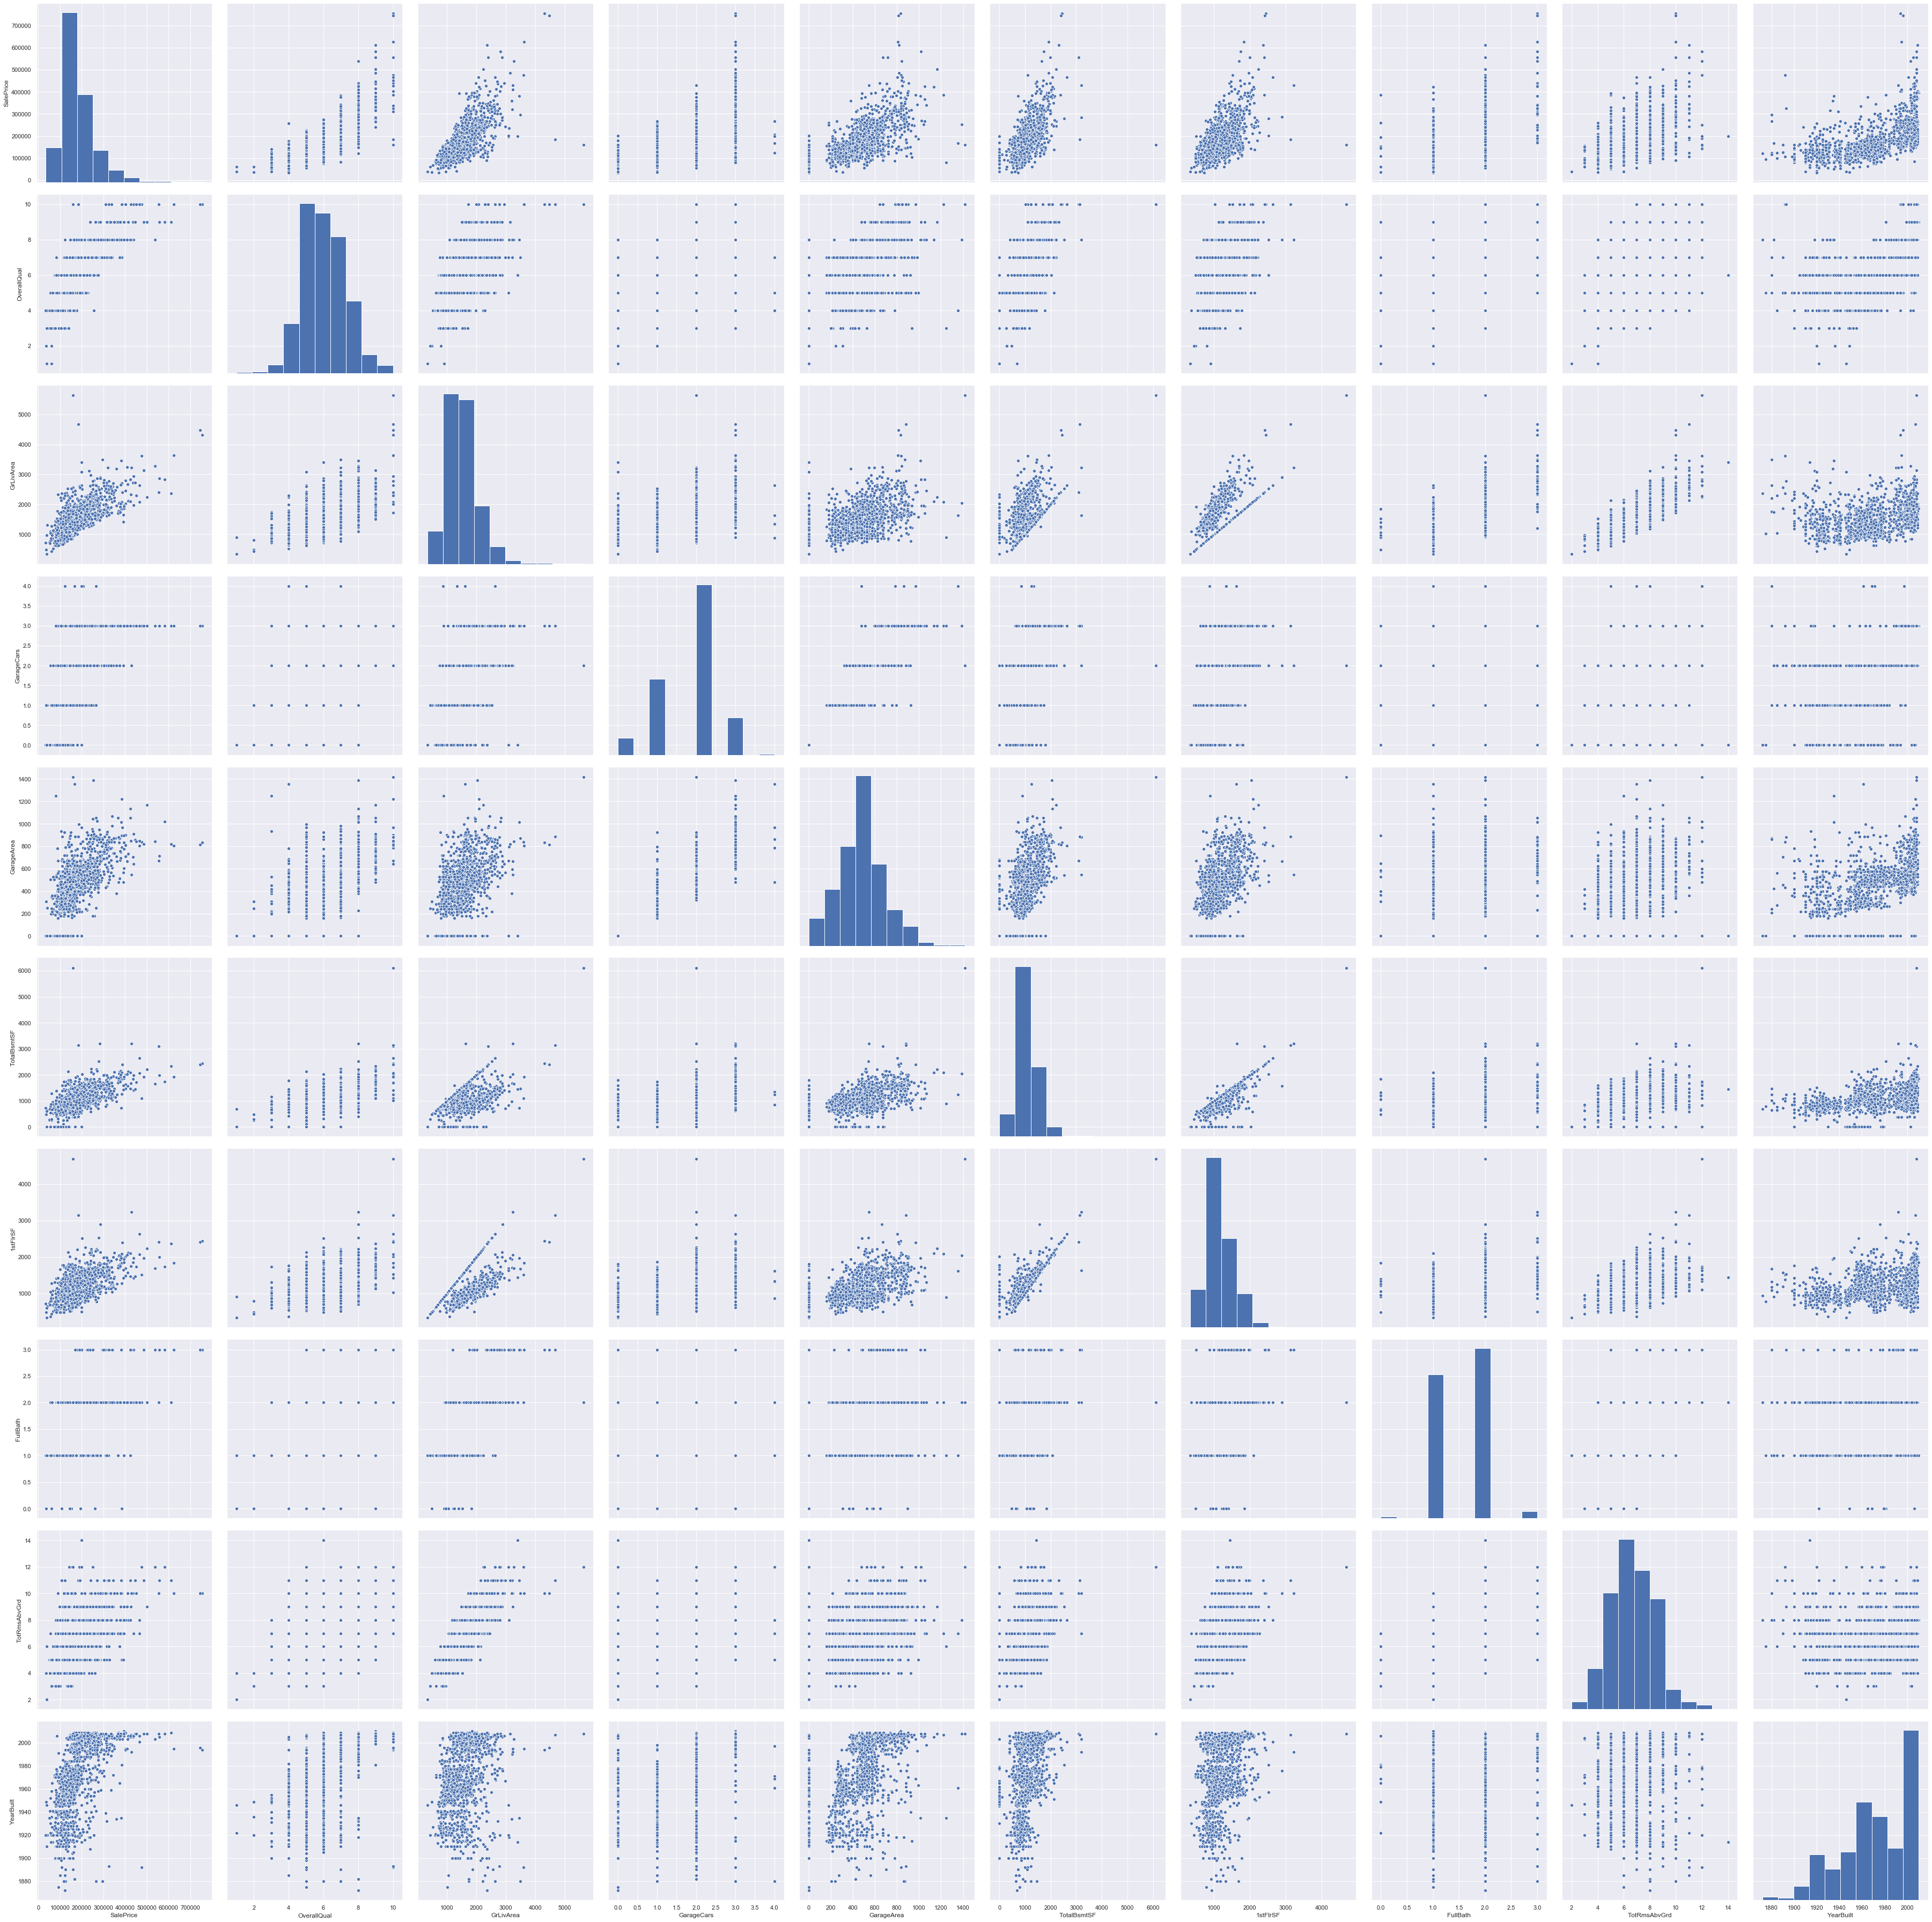

In [7]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df_raw[cols], size = 5)
plt.show();

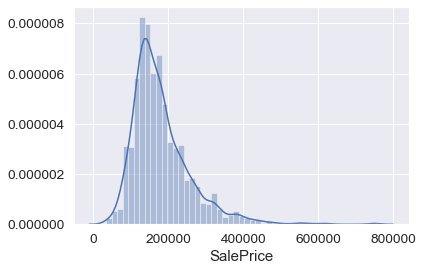

In [20]:
#histogram
sns.distplot(df_raw['SalePrice']);

- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

 <p><a name="processing"></a></p>

## Data Processing

- <a href="#domain">1.Domain Knowledge Processing</a><br>
- <a href="#outliers">2.Handling Outliers</a><br>
- <a href="#missing">3.Missing Values</a><br>
- <a href="#transform">4.Feature Transformation </a><br>
- <a href="#numeric">5.Numeric Feature Processing </a><br>

- <a href="#DM">6.Grouping Operations</a><br>
- <a href="#miss">7.Feature Split</a><br>
- <a href="#grouping">8.Scaling</a><br>
- <a href="#grouping">9.Extracting Date</a><br>


In [4]:
# make a copy so the raw data will not be affected 
df_clean = df_raw.copy()

 <p><a name="domain"></a></p>
 
### Domain Knowledge Processing

In [ ]:
# Combine bathroom quanlitity 
df_clean['BsmtBath'] = df_clean.BsmtFullBath + df_clean.BsmtHalfBath * 0.5
df_clean['Bath'] = df_clean.FullBath + df_clean.HalfBath * 0.5
df_clean = df_clean.drop(['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath'], axis=1)

# drop TotalBsmtSF - multicollinearaty
#df_clean = df_clean.drop(['TotalBsmtSF'], axis=1)

# drop GrLivArea - multicollinearaty
#df_clean = df_clean.drop(['GrLivArea'], axis=1)

# drop GarageArea - 
df_clean = df_clean.drop(['GarageArea'], axis=1) 

# drop MiscFeature 
df_clean = df_clean.drop(['MiscFeature'], axis=1) 

In [ ]:
# #histogram and normal probability plot
# sns.distplot(df_raw['SalePrice'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_raw['SalePrice'], plot=plt)

In [ ]:
# #histogram and normal probability plot
# sns.distplot(df_clean['SalePrice'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_clean['SalePrice'], plot=plt)

In [ ]:
# #histogram and normal probability plot
# sns.distplot(df_raw['GrLivArea'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_raw['GrLivArea'], plot=plt)

In [ ]:
# #histogram and normal probability plot
# sns.distplot(df_clean['GrLivArea'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_clean['GrLivArea'], plot=plt)

In [ ]:
# #histogram and normal probability plot
# sns.distplot(df_raw['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_raw['TotalBsmtSF'], plot=plt)

In [ ]:
# #histogram and normal probability plot
# sns.distplot(df_clean['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_clean['TotalBsmtSF'], plot=plt)

 <p><a name="outliers"></a></p>
 
 ### Handling Outliers 


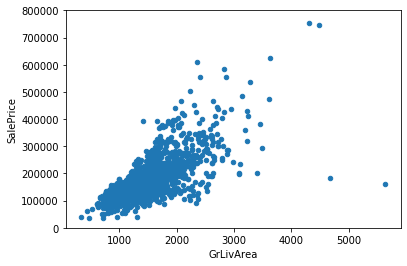

In [7]:
# Handling GrLivArea ourliers 

var = 'GrLivArea'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [8]:
df_raw.sort_values(by = 'GrLivArea', ascending = False)[:2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [9]:
outlier_list = [524, 1299]
df_clean = df_clean.drop(outlier_list)

In [ ]:
#df_clean = df_clean[df_clean.GrLivArea < 4000]
# 

In [ ]:
# hard to fit -- will update after running the model 

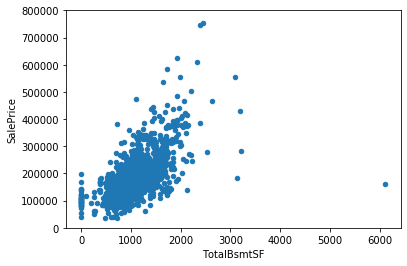

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [11]:
# Handling TotalBsmtSF ourliers  

df_raw.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<p><a name="missing"></a></p>

### Missing Values

In [25]:
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [26]:
df_clean.columns[df_clean.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
# 259 LotFrontage  - replace missing value with 0 
df_clean.LotFrontage = df_clean.LotFrontage.fillna(0)

# 1369 Alley - replace with None
df_clean.Alley = df_clean.Alley.fillna('None')

# 8 MasVnrType and MasVnrArea - replace MasVnrType with None and MasVnrArea with 0
df_clean.MasVnrType = df_clean.MasVnrType.fillna('None')
df_clean.MasVnrArea = df_clean.MasVnrArea.fillna(0)

# 37 basement: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2- replace with Nb
df_clean.BsmtQual = df_clean.BsmtQual.fillna('Nb')
df_clean.BsmtCond = df_clean.BsmtCond.fillna('Nb')
df_clean.BsmtExposure = df_clean.BsmtExposure.fillna('Nb')
df_clean.BsmtFinType1 = df_clean.BsmtFinType1.fillna('Nb')
df_clean.BsmtFinType2 = df_clean.BsmtFinType2.fillna('Nb')

# 690 FireplaceQu - replace with Nf
df_clean.FireplaceQu = df_clean.FireplaceQu.fillna('Nf')

# 81 Garage: GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - replace with Ng and year with 0 
# GarageYrBlt ???
df_clean.GarageType = df_clean.GarageType.fillna('Ng')
df_clean.GarageFinish = df_clean.GarageFinish.fillna('Ng')
df_clean.GarageQual = df_clean.GarageQual.fillna('Ng')
df_clean.GarageCond = df_clean.GarageCond.fillna('Ng')
df_clean.GarageYrBlt = df_clean.GarageYrBlt.fillna(0)

# 1453 PoolQC - replace with Np
df_clean.PoolQC = df_clean.PoolQC.fillna('Np')

# 1179 Fence - replace with Nf
df_clean.Fence = df_clean.Fence.fillna('Nf')

# 1406 MiscFeature - replace with None    
#df_clean.MiscFeature = df_clean.MiscFeature.fillna('None')

# 1 Electrical
df_clean = df_clean[pd.notnull(df_clean.Electrical)]

## missing value only in the test set 


In [ ]:
# np.sum(df_clean.isnull())

<p><a name="transform"></a></p>

### Feature Transformation 

In [5]:
df_clean.SalePrice = np.log(df_clean.SalePrice)
df_clean.GrLivArea = np.log(df_clean.GrLivArea)
#df_clean.TotalBsmtSF = np.log(df_clean.TotalBsmtSF)
# after processing missing value 

Skewness: 1.882876
Kurtosis: 6.536282


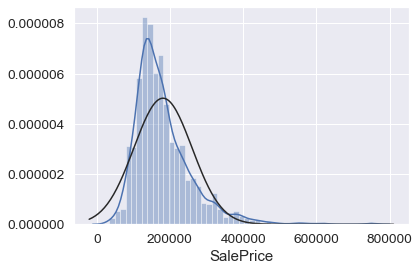

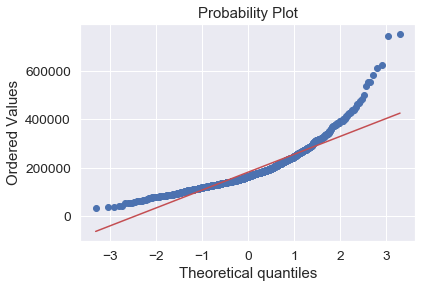

In [32]:
#histogram and normal probability plot
sns.distplot(df_raw['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['SalePrice'], plot=plt)

print("Skewness: %f" % df_raw['SalePrice'].skew())
print("Kurtosis: %f" % df_raw['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


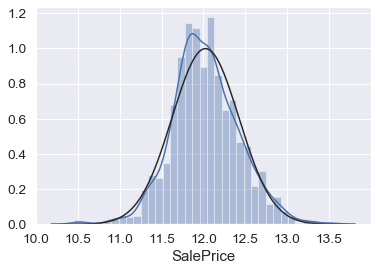

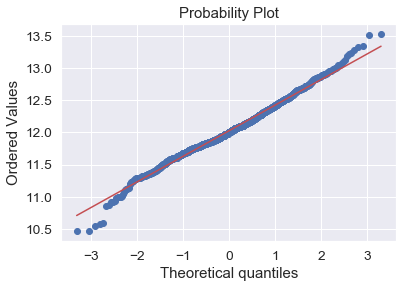

In [33]:
#histogram and normal probability plot
sns.distplot(df_clean['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['SalePrice'], plot=plt)

print("Skewness: %f" % df_clean['SalePrice'].skew())
print("Kurtosis: %f" % df_clean['SalePrice'].kurt())

Skewness: 1.366560
Kurtosis: 4.895121


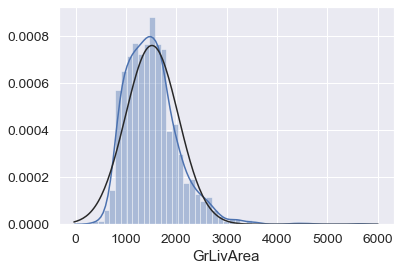

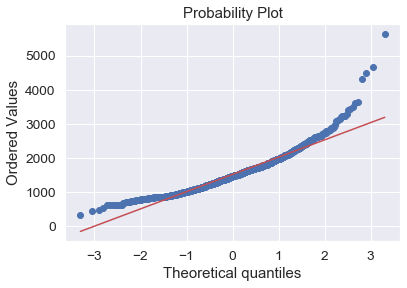

In [34]:
#histogram and normal probability plot
sns.distplot(df_raw['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['GrLivArea'], plot=plt)

print("Skewness: %f" % df_raw['GrLivArea'].skew())
print("Kurtosis: %f" % df_raw['GrLivArea'].kurt())

Skewness: -0.006995
Kurtosis: 0.282603


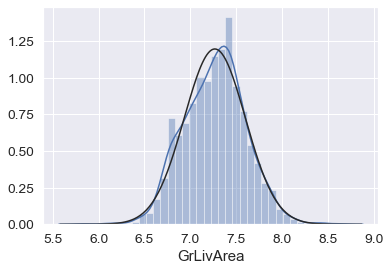

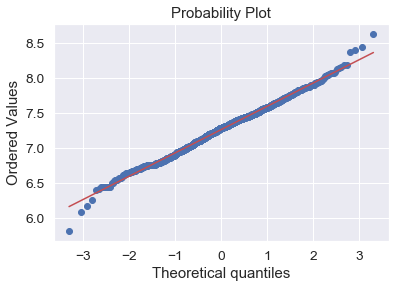

In [35]:
#histogram and normal probability plot
sns.distplot(df_clean['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['GrLivArea'], plot=plt)

print("Skewness: %f" % df_clean['GrLivArea'].skew())
print("Kurtosis: %f" % df_clean['GrLivArea'].kurt())

Skewness: 1.524255
Kurtosis: 13.250483


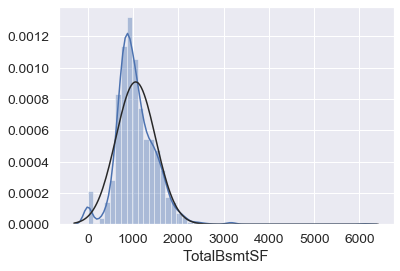

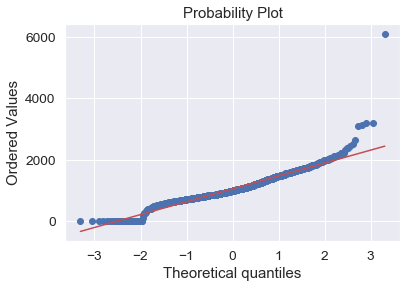

In [39]:
#histogram and normal probability plot
sns.distplot(df_raw['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['TotalBsmtSF'], plot=plt)

print("Skewness: %f" % df_raw['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_raw['TotalBsmtSF'].kurt())

# sns.distplot(df_clean['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_clean['TotalBsmtSF'], plot=plt)

# print("Skewness: %f" % df_clean['TotalBsmtSF'].skew())
# print("Kurtosis: %f" % df_clean['TotalBsmtSF'].kurt())

<p><a name="numeric"></a></p>

### Numeric Feature Processing 

- scaler 
- normalization 


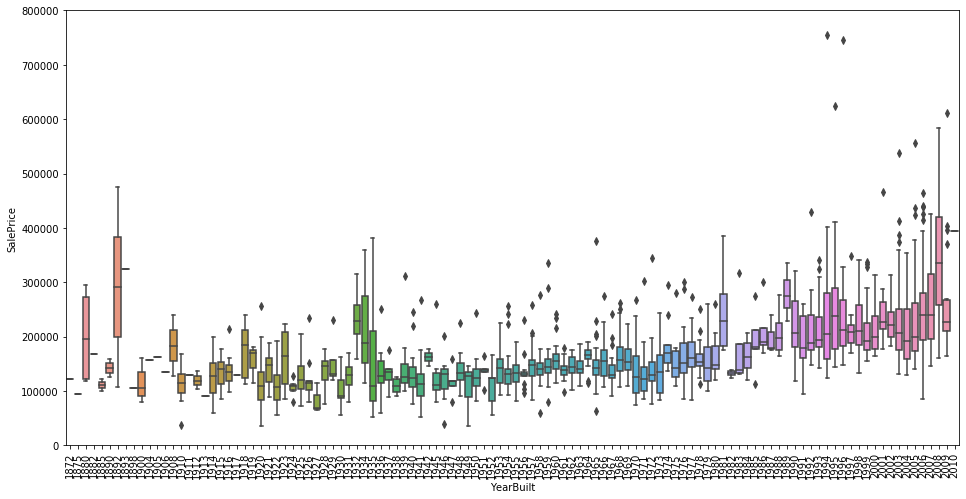

In [21]:
var = 'YearBuilt'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

  
 
 ###  Categorical Features Processsing

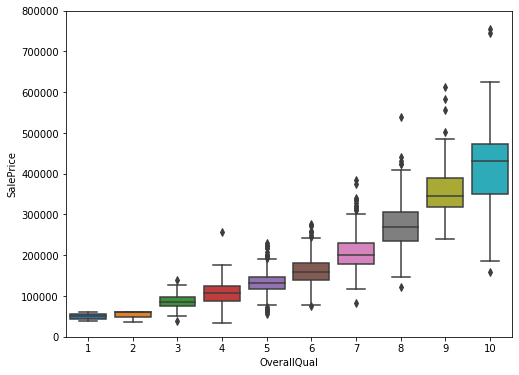

In [18]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
# MSSubClass processing - MSSubClass 20-90 contains only duplicate information with HouseStyle and YearBuilt
# replace with 0 
'''
20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

HouseStyle: Style of dwelling
       
       1Story One story
       1.5Fin One and one-half story: 2nd level finished
       1.5Unf One and one-half story: 2nd level unfinished
       2Story Two story
       2.5Fin Two and one-half story: 2nd level finished
       2.5Unf Two and one-half story: 2nd level unfinished
       SFoyer Split Foyer
       SLvl   Split Level
'''
# df_clean['MSSubClass'] = df_clean['MSSubClass'].replace([20,30,40,45,50,60,70,75,80,85], 0)
df_clean['MSSubClass'] = df_clean['MSSubClass'].replace(['20','30','40','45','50','60','70','75','80','85'], '0')

# convert numerical to categorical 
df_clean[['MSSubClass','OverallQual','OverallCond']] = df_clean[['MSSubClass','OverallQual','OverallCond']].astype(str)

# ordinal encoding 


# ordinal_list = ['OverallQual','OverallCond','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','PoolQC']

# enc = OrdinalEncoder()
# df_clean[ordinal_list] = enc.fit(df_clean[ordinal_list])

# OverallQual
# OverallCond
# ExterCond
# BsmtQual
# BsmtCond
# HeatingQC
# KitchenQual
# Functional
# FireplaceQu
# GarageQual
# PoolQC


## dummies 
df_clean = pd.get_dummies(df_clean, columns=df_clean.select_dtypes(include=['object']).columns, drop_first=True)


# le = LabelEncoder()  
# df_clean['MSZoning']= le.fit_transform(df_clean['MSZoning']) 
# onehotencoder = OneHotEncoder() 
# onehotencoder.fit_transform(df_clean).toarray() 
# df_clean['Geography']= le.fit_transform(df_clean['Geography']) 


In [ ]:
# df_clean.select_dtypes(include=['object']).columns

In [ ]:
# df_clean.dtypes

In [ ]:
# df_clean.select_dtypes(include=['object'])